# 1. Entrada

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# 2. Imports

Import all neccessary tools and visualize data

In [84]:
address = pd.read_csv('/content/address.csv')
main = pd.read_csv('/content/main.csv')
paid_record = pd.read_csv('/content/paid_record.csv')

In [85]:
address

,New_ID,ADDRESS
0,5008804L,"06042, CT, 31 Mitchell Road"
1,5008805G,"72703, AR, 1189 Northwest End Avenue"
2,5008806D,"72701, AR, 218 Shipley Alley"
3,5008808I,"3138 P Street Northwest, 20007, DC"
4,5008809Z,"2405 230th Street, 21122, MD"
...,...,...
438752,5680433,"37080, TN, 7730 Wilkinson Road"
438753,5353755,"2815 Saint Edwards Drive, 37211, TN"
438754,5689895,"85306, AZ, 5434 West Beck Lane"
438755,5833391,"05641, VT, 21 Hill Street"


In [86]:
main

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.0,0.0,Sales staff,2.0,04/06/1991,X,6153574
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,NaN,0.0,NaN,2.0,05/01/1978,V,6153575
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.0,0.0,Sales staff,2.0,07/03/1974,J,6153576
438755,M,N,NaN,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.0,0.0,Laborers,2.0,08/03/1965,S,6153578


In [87]:
main.Main_ID.value_counts()

5008804    2
5008986    2
5008967    2
5008971    2
5008973    2
          ..
6620863    1
6620862    1
6620861    1
6620858    1
6842885    1
Name: Main_ID, Length: 438510, dtype: int64

In [88]:
paid_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [89]:
paid_record.ID.value_counts()

5016769    61
5002806    61
5118192    61
5145767    61
5078567    61
           ..
5028795     1
5148442     1
5053900     1
5046332     1
5079047     1
Name: ID, Length: 45985, dtype: int64

In [90]:
paid_record.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

## 2.1 Nulls

In [91]:
address.isnull().sum()

New_ID     0
ADDRESS    0
dtype: int64

In [92]:
main.isnull().sum()

CODE_GENDER             10863
FLAG_OWN_CAR            11052
FLAG_OWN_REALTY         10951
CNT_CHILDREN            10931
AMT_INCOME_TOTAL        11133
NAME_INCOME_TYPE        11039
NAME_EDUCATION_TYPE     11103
NAME_FAMILY_STATUS      10985
NAME_HOUSING_TYPE       11064
DAYS_EMPLOYED           10973
FLAG_MOBIL              11067
FLAG_WORK_PHONE         11042
FLAG_PHONE              11083
FLAG_EMAIL              10987
OCCUPATION_TYPE        141805
CNT_FAM_MEMBERS         10934
DAYS_BIRTH_CLEAN        10715
Letter                      0
Main_ID                     0
dtype: int64

In [93]:
paid_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### 2.1.1 Nulls OCCUPATION_TYPE

In [94]:
main['OCCUPATION_TYPE'].value_counts()

Laborers                 76377
Core staff               42019
Sales staff              40067
Managers                 34603
Drivers                  25471
High skill tech staff    16844
Accountants              15616
Medicine staff           13194
Cooking staff             7874
Security staff            7792
Cleaning staff            5683
Private service staff     3364
Low-skill Laborers        2086
Secretaries               1990
Waiters/barmen staff      1616
Realty agents             1009
HR staff                   760
IT staff                   587
Name: OCCUPATION_TYPE, dtype: int64

## 2.2 Group_by paid_records

In [95]:
#Count per Months Balance
paid_record.groupby('ID').count()[['MONTHS_BALANCE']]

,MONTHS_BALANCE
ID,
5001711,4
5001712,19
5001713,22
5001714,15
5001715,60
...,...
5150482,18
5150483,18
5150484,13


In [96]:
pd.crosstab(paid_record['STATUS'], paid_record['MONTHS_BALANCE'])

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
STATUS,,,,,,,,,,,,,,,,,,,,,
0,230,538,850,1120,1416,1719,1947,2223,2496,2769,...,9566,9752,10062,10279,10568,10491,10610,10398,10301,8914
1,0,3,11,17,28,37,46,56,66,74,...,269,300,305,309,316,379,313,367,372,309
2,0,0,0,0,2,1,2,6,5,10,...,21,24,15,19,20,21,31,19,17,19
3,0,0,0,0,0,2,2,1,2,2,...,7,7,9,7,9,5,6,11,6,6
4,0,0,0,0,0,0,1,0,1,1,...,4,4,6,8,9,8,5,3,11,5
5,0,0,0,0,0,0,0,3,3,4,...,46,42,44,48,54,54,54,57,62,65
C,1,9,24,52,91,148,230,318,435,558,...,14422,14811,15220,15630,16015,16403,16784,17139,17504,17613
X,184,270,370,460,572,671,800,891,1017,1157,...,5937,5944,5979,5996,5890,6004,6051,6215,6163,6925


# 3. Data Wrangling

## 3.1 paid_record calssification

Classification on status:

- C = 0
- 0 = 1
- 1 = 2
- 2 = 3
- 3 = 4
- 4 = 5
- 5 = 6
- X = X


In [97]:
#Classification per status
new_class = {
    'X':0,
    'C':0,
    "0":1,
    "1":2,
    "2":3,
    "3":4,
    "4":5,
    "5":6}

In [98]:
#Copy the original dataset
n_paid_record = paid_record

#Rename columns
n_paid_record.columns = ['Main_ID', 'MONTHS_BALANCE', 'TOTAL_IMPAYMENTS']

n_paid_record

,Main_ID,MONTHS_BALANCE,TOTAL_IMPAYMENTS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [99]:
#Apply changes
n_paid_record.TOTAL_IMPAYMENTS = n_paid_record.TOTAL_IMPAYMENTS.replace(new_class)

In [100]:
n_paid_record

,Main_ID,MONTHS_BALANCE,TOTAL_IMPAYMENTS
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [101]:
new_data = n_paid_record.groupby('Main_ID').sum()[['TOTAL_IMPAYMENTS']]

In [102]:
n_paid_record.TOTAL_IMPAYMENTS.value_counts().sort_index()

0    651261
1    383120
2     11090
3       868
4       320
5       223
6      1693
Name: TOTAL_IMPAYMENTS, dtype: int64

## 3.2 Dataset merge

Join all datasets into one

In [103]:
# Join columns Main_ID and Letter
main['New_ID'] = main['Main_ID'].astype(str) + main['Letter'].astype(str)

In [104]:
#Merge datasets into one
main = main.merge(address, how='left', on='New_ID')
main = main.merge(new_data, how='left', on='Main_ID')

__Main Dataset definition__

*After Merge*

In [105]:
#Column filtering
main = main[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
       'FLAG_WORK_PHONE', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH_CLEAN', 'TOTAL_IMPAYMENTS']]

In [106]:
#Convert AGE
main['Age'] = (pd.to_datetime(date.today()) -  pd.to_datetime(main['DAYS_BIRTH_CLEAN'])).dt.days / 365.25

In [107]:
main.info

<bound method DataFrame.info of        FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL  DAYS_EMPLOYED  \
0                 Y               Y          427500.0        -4542.0   
1                 Y               Y          427500.0        -4542.0   
2                 Y               Y          112500.0        -1134.0   
3                 N               Y          270000.0        -3051.0   
4               NaN               Y          270000.0        -3051.0   
...             ...             ...               ...            ...   
438762            N               N          130500.0        -3331.0   
438763            Y               Y          180000.0        -5941.0   
438764            N               Y          148500.0         -880.0   
438765            N             NaN          180000.0         -885.0   
438766            N               Y          225000.0         -783.0   

        FLAG_WORK_PHONE  CNT_FAM_MEMBERS DAYS_BIRTH_CLEAN  TOTAL_IMPAYMENTS  \
0                   1.0 

In [108]:
main.TOTAL_IMPAYMENTS.value_counts()

0.0      4484
6.0      3160
4.0      2502
5.0      2417
3.0      2265
         ... 
116.0       1
278.0       1
266.0       1
168.0       1
149.0       1
Name: TOTAL_IMPAYMENTS, Length: 113, dtype: int64

# 4. Cut

Define parameters to implement models

In [109]:
main_var = main[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','TOTAL_IMPAYMENTS']]
main_var

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,TOTAL_IMPAYMENTS
0,427500.0,-4542.0,3.0
1,427500.0,-4542.0,3.0
2,112500.0,-1134.0,7.0
3,270000.0,-3051.0,2.0
4,270000.0,-3051.0,0.0
...,...,...,...
438762,130500.0,-3331.0,NaN
438763,180000.0,-5941.0,NaN
438764,148500.0,-880.0,NaN
438765,180000.0,-885.0,NaN


## 4.1 Visualize data

In [110]:
#Plot first 1k AMT_INCOME_TOTAL
fig = px.histogram(main_var.AMT_INCOME_TOTAL.head(1000), x="AMT_INCOME_TOTAL")
fig.show()

In [111]:
#Plot first 1k Total impayments

fig = px.histogram(main_var.TOTAL_IMPAYMENTS.head(1000), x='TOTAL_IMPAYMENTS')
fig.show()

## 4.2 Apply all filter for cuts

In [112]:
#Define 
main['Frac'] = 0

In [113]:
#Define
main['Frac'] = 0
main.loc[main['TOTAL_IMPAYMENTS'] == 0.0, 'Frac'] = 1
main.loc[(main['TOTAL_IMPAYMENTS'] < 10.0) & (main['AMT_INCOME_TOTAL'] >= 200000.0), 'Frac'] = 1
main.loc[(main['TOTAL_IMPAYMENTS'] >= 10.0) & (main['TOTAL_IMPAYMENTS'] < 20.0) & (main['AMT_INCOME_TOTAL'] >= 300000.0), 'Frac'] = 1
main.Frac.value_counts()

0    426472
1     12295
Name: Frac, dtype: int64

In [114]:
main

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,TOTAL_IMPAYMENTS,Age,Frac
0,Y,Y,427500.0,-4542.0,1.0,2.0,09/04/1990,3.0,32.490075,1
1,Y,Y,427500.0,-4542.0,1.0,2.0,09/04/1990,3.0,32.490075,1
2,Y,Y,112500.0,-1134.0,0.0,2.0,06/05/1964,7.0,58.737851,0
3,N,Y,270000.0,-3051.0,0.0,1.0,26/10/1970,2.0,52.347707,1
4,NaN,Y,270000.0,-3051.0,0.0,1.0,26/10/1970,0.0,52.347707,1
...,...,...,...,...,...,...,...,...,...,...
438762,N,N,130500.0,-3331.0,1.0,2.0,04/06/1991,NaN,31.904175,0
438763,Y,Y,180000.0,-5941.0,0.0,2.0,05/01/1978,NaN,44.835044,0
438764,N,Y,148500.0,-880.0,0.0,2.0,07/03/1974,NaN,48.662560,0
438765,N,NaN,180000.0,-885.0,1.0,2.0,08/03/1965,NaN,57.577002,0


# 5 Null Management

In [115]:
cols_binary = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [116]:
main[cols_binary] = main[cols_binary].replace(['Y', 'N'], [1, 0])
main = main.drop(['DAYS_BIRTH_CLEAN'], axis = 1)

cols = main.columns

simple_imputer = SimpleImputer(strategy='median').fit(main)
main = simple_imputer.transform(main)

# 6. Model

In [117]:
main = pd.DataFrame(main, columns=cols)

In [118]:
X = main.drop(['Frac'], axis=1)
y = main['Frac']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6.1 Pipeline

In [120]:
# Define the list of models to be trained
models = [
    ('LGBM', LGBMClassifier()),
    ('RandomForest', RandomForestClassifier())]
models = [
    ('LGBM', LGBMClassifier())]

# Define the grid of hyperparameters to be searched for each model -> Hyperparameter tuning with Cross Validation
param_grid = [
    {
        'max_depth': [10],
        'min_child_weight': [4],
        'n_estimators': [300],
        'learning_rate': [0.001]
    },
    {
        'n_estimators': [300],
        'max_features': ['auto'],
        'max_depth': [6],
    },
]
param_grid = [
    {
        'max_depth': [10],
        'min_child_weight': [4],
        'n_estimators': [300],
        'learning_rate': [0.001]
    }
]

best_precision = 0
best_model = None
precisions = {}


# Train the models and evaluate their precision
for (name, model), grid in zip(models, param_grid):
    clf = GridSearchCV(model, grid, scoring='precision')
    clf.fit(X_train, y_train)
    precision = clf.best_score_
    print(f"{name} precision: {precision:.3f}")
    precisions[name] = precision
    # Evaluate the precision on the validation set
    precision_val = clf.score(X_test, y_test)
    print(f"{name} validation precision: {precision_val:.3f}")
    # Update the best model if it performs better on the validation set
    if precision_val > best_precision:
        best_precision = precision_val
        best_model = clf

LGBM precision: 0.000
LGBM validation precision: 0.000


In [124]:
y_train.value_counts()

0.0    298496
1.0      8640
Name: Frac, dtype: int64

Definimos una pipeline con gridsearchCV para hacer hyperparameter tunining, pero dado el tiempo limitado no hemos podido probar todos los modelos y combinacion de parametros que queríamos.

In [ ]:
# These are the parameters for the best model with the best combination of hyperparameters
print(best_model.best_params_)

0.0    426472
1.0     12295
Name: Frac, dtype: int64


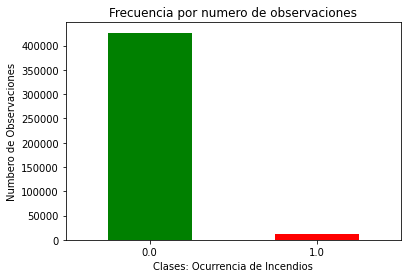

In [127]:
count_classes = pd.value_counts(main['Frac'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color=['green','red'])
plt.title("Frecuencia por numero de observaciones")
plt.xlabel("Clases: Ocurrencia de Incendios")
plt.ylabel("Numbero de Observaciones")
print(count_classes)

0.0    298496
1.0    298496
Name: Frac, dtype: int64


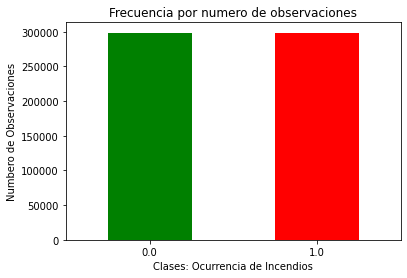

In [144]:
count_classes = pd.value_counts(y_smote, sort = True)
count_classes.plot(kind = 'bar', rot=0, color=['green','red'])
plt.title("Frecuencia por numero de observaciones")
plt.xlabel("Clases: Ocurrencia de Incendios")
plt.ylabel("Numbero de Observaciones")
print(count_classes)

## 6.2 Model

In [128]:
model = LogisticRegression(C=1.0, penalty='l2', random_state=1,solver="newton-cg", class_weight="balanced").fit(X_train, y_train)

In [131]:
y_pred = model.predict(X_test)

In [134]:
print(accuracy_score(y_test, y_pred))

0.8126885004292302


In [135]:
model_xgb = XGBClassifier(n_estimators= 500,
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1,
                      max_depth=5, verbose=3)

model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

[13:58:01] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



In [136]:
print(accuracy_score(y_test, y_pred))

0.9941882991088725


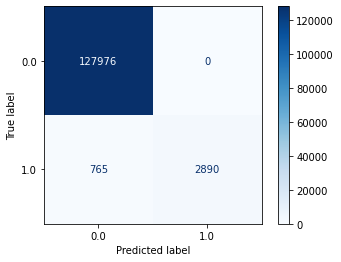

In [137]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_xgb, X_test, y_test, cmap = plt.cm.Blues)

In [138]:
print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')
print(classification_report(y_test, y_pred))

Conjunto de datos de validación
  Exactitud:     0.99419
  Precisión:     0.99703
  Exhaustividad: 0.89535
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    127976
         1.0       1.00      0.79      0.88      3655

    accuracy                           0.99    131631
   macro avg       1.00      0.90      0.94    131631
weighted avg       0.99      0.99      0.99    131631



We attempt a smote

In [139]:
from imblearn.over_sampling import SMOTE
X_smote , y_smote = SMOTE().fit_resample(X_train, y_train)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

Before OverSampling, counts of label '1': 8640
Before OverSampling, counts of label '0': 298496 

After OverSampling, the shape of train_X: (596992, 8)
After OverSampling, the shape of train_y: (596992,) 

After OverSampling, counts of label '1': 298496
After OverSampling, counts of label '0': 298496


In [140]:
model_xgb = XGBClassifier(n_estimators= 500,
                      learning_rate=0.0001,
                      objective= 'binary:logistic',
                      random_state=0,
                      n_jobs=-1,
                      max_depth=5, verbose=3)

model_xgb.fit(X_smote, y_smote)
y_pred = model_xgb.predict(X_test)

[14:01:07] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



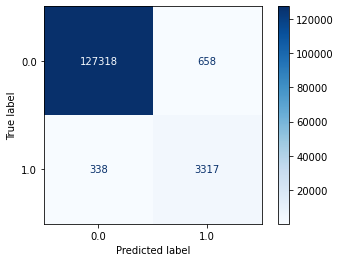

In [141]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_xgb, x_smote, y_smote, cmap = plt.cm.Blues)

In [142]:
print(f'Conjunto de datos de validación')
print(f'  Exactitud:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Precisión:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')
print(classification_report(y_test, y_pred))

Conjunto de datos de validación
  Exactitud:     0.99243
  Precisión:     0.91591
  Exhaustividad: 0.95119
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    127976
         1.0       0.83      0.91      0.87      3655

    accuracy                           0.99    131631
   macro avg       0.92      0.95      0.93    131631
weighted avg       0.99      0.99      0.99    131631

